In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [6]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [7]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [8]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)

In [10]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


수상한 도미 한 마리

In [11]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [12]:
print(kn.predict([[25,150]]))

[0.]


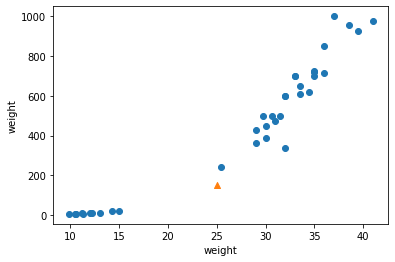

In [13]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = "^")
plt.xlabel('weight')
plt.ylabel('weight')
plt.show()

In [14]:
distances, indexes = kn.kneighbors([[25, 150]])
print(distances, indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


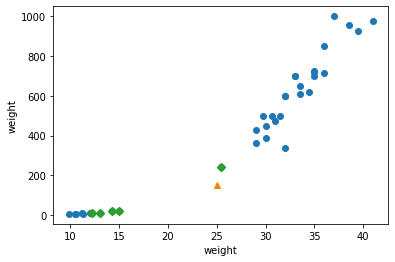

In [15]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = "^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = "D")
plt.xlabel('weight')
plt.ylabel('weight')
plt.show()

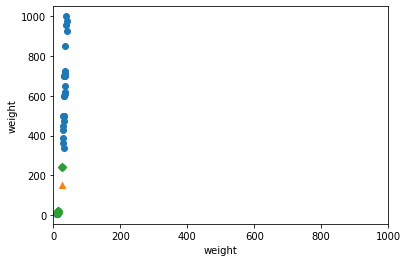

In [16]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = "^")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = "D")
plt.xlim((0, 1000))
plt.xlabel('weight')
plt.ylabel('weight')
plt.show()

데이터 전처리

In [17]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [18]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [19]:
train_scaled = (train_input - mean) / std

전처리 데이터로 모델 훈련하기